In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17251005786404044853
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14240977763022526086
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
# Specifica i percorsi delle cartelle di addestramento e validazione
train_data_dir = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Final_Organoids_Dataset/train_folder'
val_data_dir = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Final_Organoids_Dataset/val_folder'

In [ ]:
from tensorflow.keras.layers import Input

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))

In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False)


94668760/94668760 [==============================] - 5s 0us/step


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


# Reference to the output of the base model
x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a dense layer
x = Dense(512, activation='relu')(x)

# Add final dense layer for 4 classes with softmax activation
predictions = Dense(4, activation='softmax')(x)

# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

# (Optional) To only train the top layers and freeze the rest:
for layer in base_model.layers:
    layer.trainable = False

# Compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, None, None, 64)       0         ['conv1_conv[0][0]']          
                                                                                              

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint

In [ ]:
batch_size = 256
num_epochs = 40


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Utilizza l'ImageDataGenerator per la generazione di dati
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Definisci i generatori di dati per l'addestramento e la validazione
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 18537 images belonging to 4 classes.
Found 2058 images belonging to 4 classes.


In [ ]:
import time
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint_filepath = '/content/best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# Start measuring time
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[model_checkpoint_callback]  # Add the ModelCheckpoint to the callbacks list
)

# End measuring time
end_time = time.time()

# Calculate computational cost
computational_cost = end_time - start_time

# Print computational cost
print(f"Computational cost for model.fit: {computational_cost} seconds")

Epoch 1/40
72/72 [==============================] - ETA: 0s - loss: 0.3780 - accuracy: 0.8483 
Epoch 1: val_loss improved from inf to 0.37729, saving model to /content/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/72 [==============================] - 5043s 71s/step - loss: 0.3780 - accuracy: 0.8483 - val_loss: 0.3773 - val_accuracy: 0.8501
Epoch 2/40
72/72 [==============================] - ETA: 0s - loss: 0.3300 - accuracy: 0.8704
Epoch 2: val_loss did not improve from 0.37729
72/72 [==============================] - 89s 1s/step - loss: 0.3300 - accuracy: 0.8704 - val_loss: 0.3973 - val_accuracy: 0.8350
Epoch 3/40
72/72 [==============================] - ETA: 0s - loss: 0.2982 - accuracy: 0.8838
Epoch 3: val_loss did not improve from 0.37729
72/72 [==============================] - 91s 1s/step - loss: 0.2982 - accuracy: 0.8838 - val_loss: 0.3866 - val_accuracy: 0.8496
Epoch 4/40
72/72 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.8979
Epoch 4: val_loss did not improve from 0.37729
72/72 [==============================] - 89s 1s/step - loss: 0.2625 - accuracy: 0.8979 - val_loss: 0.3805 - val_accuracy: 0.8506
Epoch 5/40
72/72 [==============================] - ETA: 0

In [ ]:
#track the curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

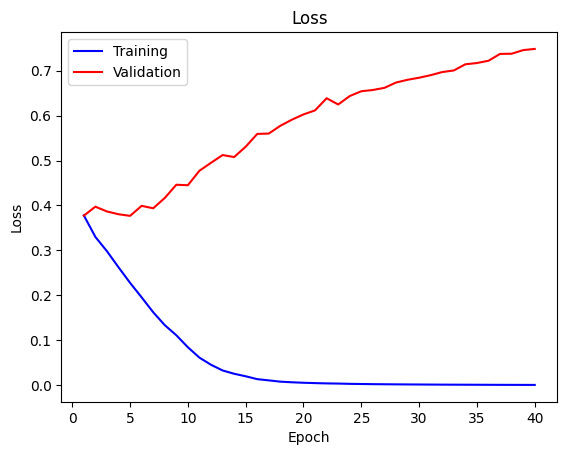

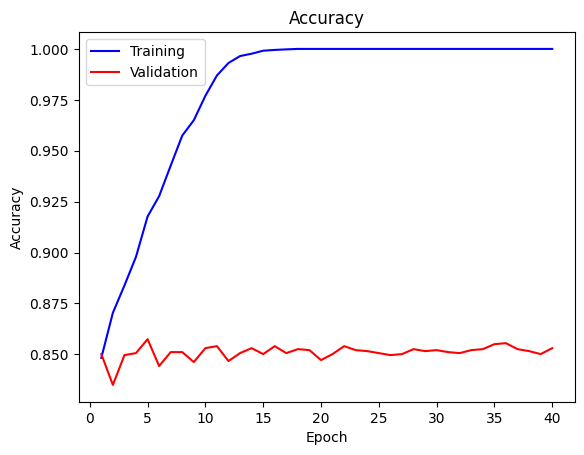

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined train_loss, val_loss, train_acc, and val_acc

epochs = range(1, len(train_loss) + 1)

# Plot and save the loss figure with 600 DPI
plt.plot(epochs, train_loss, 'b-', label='Training')
plt.plot(epochs, val_loss, 'r-', label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save the figure in a suitable format (e.g., PNG) with 600 DPI for line drawings
plt.savefig('loss_plot_line_drawings.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

# Plot and save the accuracy figure with 600 DPI
plt.plot(epochs, train_acc, 'b-', label='Training')
plt.plot(epochs, val_acc, 'r-', label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Save the figure in a suitable format (e.g., PNG) with 600 DPI for line drawings
plt.savefig('accuracy_plot_line_drawings.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_dir = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Final_Organoids_Dataset/test_folder'

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2468 images belonging to 4 classes.


In [ ]:
#DA PROVARE

import time
import numpy as np
from keras.models import load_model

# Load the best model
model_path = '/content/best_model.h5'
model = load_model(model_path)

# Start measuring time
start_time = time.time()

# Assuming you have defined test_generator
# This is just for measuring the time spent on loading data and making predictions

# Load true labels
y_true = test_generator.classes  # Etichette reali

# Make predictions
y_pred = model.predict(test_generator)  # Previsioni del modello

# Calculate predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)  # Classi predette

# End measuring time
end_time = time.time()

# Calculate computational cost
computational_cost = end_time - start_time

# Print computational cost
print(f"Computational cost: {computational_cost} seconds")

10/10 [==============================] - 1885s 209s/step
Computational cost: 2124.99041891098 seconds
Computational cost: 2124.99041891098 seconds


In [ ]:
y_pred

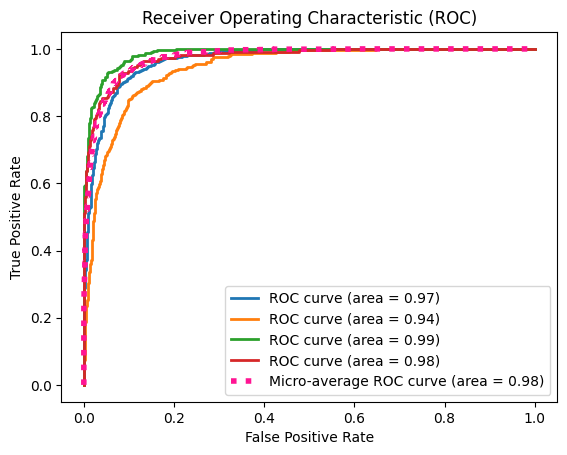

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming you have defined y_true and y_pred_classes as described in your code
# y_true contains true labels, and y_pred_classes contains predicted classes

# Binarize the true labels (one-hot encoding)
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"],
         color='deeppink', linestyle=':', linewidth=4)

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
# Save the figure in a suitable format (e.g., PNG) with 600 DPI for line drawings
plt.savefig('roc_curves.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


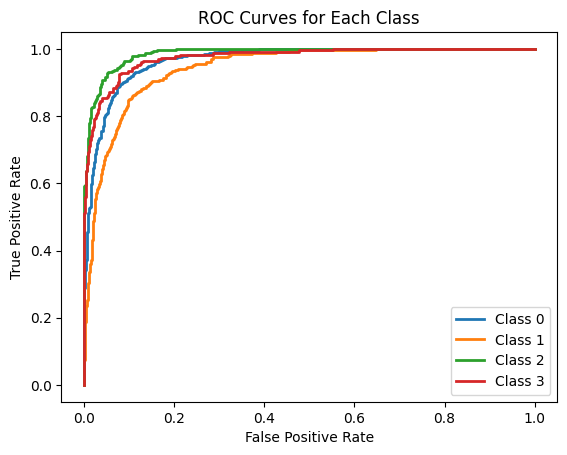

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have defined y_true and y_pred as described in your previous code
# y_true contains true labels, and y_pred contains predicted probabilities

# Binarize the true labels (one-hot encoding)
n_classes = 4  # Number of classes (change to your actual number of classes)
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Initialize dictionaries to store FPR and TPR for each class
fpr_dict = {}
tpr_dict = {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])

# Plot ROC curves for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], lw=lw, label=f'Class {i}')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.savefig('roc_curves_for_class.png', format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

# Save FPR and TPR values to separate CSV files for each class
for i in range(n_classes):
    class_name = f'Class_{i}'
    fpr = fpr_dict[i]
    tpr = tpr_dict[i]

    # Save FPR and TPR values for the class to a CSV file
    with open(f'{class_name}_roc_curve.csv', 'w') as file:
        file.write('False Positive Rate, True Positive Rate\n')
        for j in range(len(fpr)):
            file.write(f'{fpr[j]}, {tpr[j]}\n')


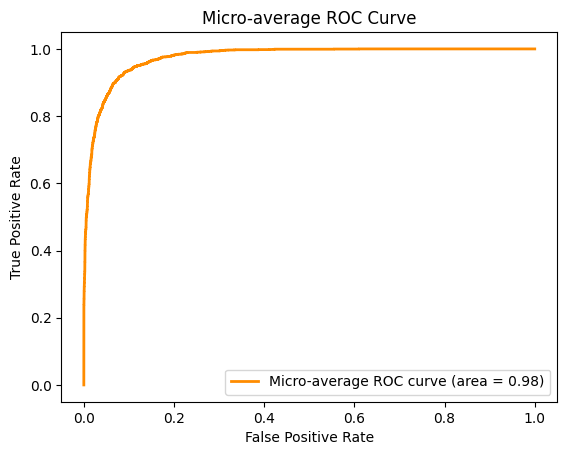

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming you have defined y_true and y_pred as described in your previous code
# y_true contains true labels, and y_pred contains predicted probabilities

# Binarize the true labels (one-hot encoding)
n_classes = 4  # Number of classes (change to your actual number of classes)
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr_micro, tpr_micro, color='darkorange',
         lw=lw, label=f'Micro-average ROC curve (area = {roc_auc_micro:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")
plt.savefig('micro_avg_roc_curves.png', format='png', dpi=600, bbox_inches='tight')


# Show the plot
plt.show()

import pandas as pd

# Create a dataframe with fpr_micro and tpr_micro
df = pd.DataFrame({'fpr_micro': fpr_micro, 'tpr_micro': tpr_micro})

# Save the dataframe to a CSV file
df.to_csv('fpr_tpr_micro_values.csv', index=False)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8521069692058347
Precision: 0.8554971839775841
Recall: 0.8521069692058347
F1-score: 0.8534074934193832


In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print("Matrice di confusione:")
print(confusion_mtx)

Matrice di confusione:
[[1155   93    1   45]
 [  52  434   57    5]
 [   1   61  339    0]
 [  44    5    1  175]]


In [ ]:
# Assuming you have defined confusion_mtx as described in your code

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Save the confusion matrix values to a text file (e.g., CSV)
with open('confusion_matrix.csv', 'w') as file:
    file.write("Confusion Matrix:\n")
    for row in confusion_mtx:
        file.write(','.join(map(str, row)) + '\n')

Confusion Matrix:
[[1155   93    1   45]
 [  52  434   57    5]
 [   1   61  339    0]
 [  44    5    1  175]]


In [ ]:
#print PPT

import numpy as np
from sklearn.metrics import roc_curve

# Assuming you have defined y_true and y_pred as described in your previous code
# y_true contains true labels, and y_pred contains predicted probabilities

# Binarize the true labels (one-hot encoding)
n_classes = 4  # Number of classes (change to your actual number of classes)
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Initialize dictionaries to store FPR and TPR for each class
fpr_dict = {}
tpr_dict = {}

# Compute ROC curve for each class
for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])

# Print TPR and FPR for each class
for i in range(n_classes):
    print(f"Class {i}:")
    print(f"TPR (True Positive Rate): {tpr_dict[i]}")
    print(f"FPR (False Positive Rate): {fpr_dict[i]}")
    print()


Class 0:
TPR (True Positive Rate): [0.00000000e+00 7.72797527e-04 2.57341577e-01 2.57341577e-01
 2.89799073e-01 2.89799073e-01 3.29211747e-01 3.29211747e-01
 3.29984544e-01 3.29984544e-01 3.42349304e-01 3.42349304e-01
 3.54714065e-01 3.54714065e-01 3.71715611e-01 3.71715611e-01
 3.75579598e-01 3.75579598e-01 4.09582689e-01 4.09582689e-01
 4.55177743e-01 4.55177743e-01 4.76816074e-01 4.76816074e-01
 4.94590417e-01 4.94590417e-01 5.13137558e-01 5.13137558e-01
 5.15455951e-01 5.15455951e-01 5.27047913e-01 5.27047913e-01
 5.27820711e-01 5.27820711e-01 5.29366306e-01 5.29366306e-01
 5.81143740e-01 5.81143740e-01 5.96599691e-01 5.96599691e-01
 6.06646059e-01 6.06646059e-01 6.25193199e-01 6.25193199e-01
 6.35239567e-01 6.35239567e-01 6.44513138e-01 6.44513138e-01
 6.45285935e-01 6.45285935e-01 6.47604328e-01 6.47604328e-01
 6.62287481e-01 6.62287481e-01 6.74652241e-01 6.74652241e-01
 6.87789799e-01 6.87789799e-01 6.91653787e-01 6.91653787e-01
 6.98608964e-01 6.98608964e-01 7.03245750e-01 7.03

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have defined y_true and y_pred_classes as described in your previous code
# y_true contains true labels, and y_pred_classes contains predicted classes

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate classification report
classification_rep = classification_report(y_true, y_pred_classes)

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Print classification report
print("\nClassification Report:")
print(classification_rep)

# Print overall accuracy
print(f"\nOverall Accuracy: {accuracy:.2%}")


Confusion Matrix:
[[1155   93    1   45]
 [  52  434   57    5]
 [   1   61  339    0]
 [  44    5    1  175]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1294
           1       0.73      0.79      0.76       548
           2       0.85      0.85      0.85       401
           3       0.78      0.78      0.78       225

    accuracy                           0.85      2468
   macro avg       0.82      0.83      0.82      2468
weighted avg       0.86      0.85      0.85      2468


Overall Accuracy: 85.21%


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have defined y_true and y_pred_classes as described in your previous code
# y_true contains true labels, and y_pred_classes contains predicted classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate sensitivity (TPR) and specificity for each class
sensitivity = []
specificity = []

for i in range(len(confusion_mtx)):
    true_positives = confusion_mtx[i, i]
    false_negatives = np.sum(confusion_mtx[i, :]) - true_positives
    true_negatives = np.sum(confusion_mtx) - np.sum(confusion_mtx[i, :]) - np.sum(confusion_mtx[:, i]) + true_positives
    false_positives = np.sum(confusion_mtx[:, i]) - true_positives

    sensitivity_i = true_positives / (true_positives + false_negatives)
    specificity_i = true_negatives / (true_negatives + false_positives)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

# Print sensitivity and specificity for each class
for i in range(len(sensitivity)):
    print(f"Class {i}:")
    print(f"Sensitivity (True Positive Rate): {sensitivity[i]:.2f}")
    print(f"Specificity (True Negative Rate): {specificity[i]:.2f}")
    print()


Class 0:
Sensitivity (True Positive Rate): 0.89
Specificity (True Negative Rate): 0.92

Class 1:
Sensitivity (True Positive Rate): 0.79
Specificity (True Negative Rate): 0.92

Class 2:
Sensitivity (True Positive Rate): 0.85
Specificity (True Negative Rate): 0.97

Class 3:
Sensitivity (True Positive Rate): 0.78
Specificity (True Negative Rate): 0.98



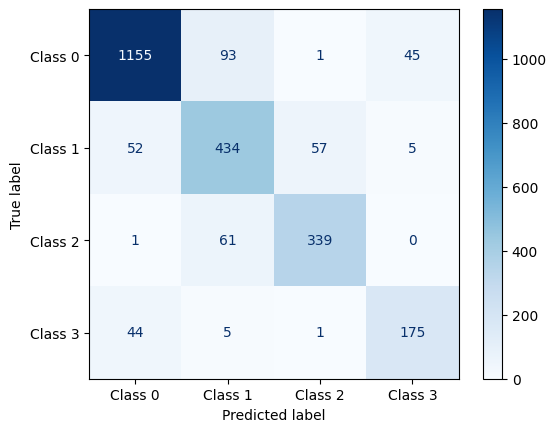

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# Display labels for the classes
display_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=display_labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)

# Save the figure as a PNG file
plt.savefig('cm_conf_4_classes.png', dpi=100)

# Show the plot
plt.show()


In [ ]:
confusion_mtx

array([[1155,   93,    1,   45],
       [  52,  434,   57,    5],
       [   1,   61,  339,    0],
       [  44,    5,    1,  175]])

In [ ]:
import numpy as np

def print_confusion_matrix(matrix):
    print("Confusion Matrix:")
    print("array(", end='')
    for i, row in enumerate(matrix):
        if i == 0:
            print("[", end='')
        else:
            print("       [", end='')

        for j, value in enumerate(row):
            end_char = ", " if j < len(row) - 1 else "]"
            print(f"{value:>4}", end=end_char)

        if i < len(matrix) - 1:
            print(",")
        else:
            print("])")

# Test
matrix =confusion_mtx
print_confusion_matrix(matrix)


Confusion Matrix:
array([1155,   93,    1,   45],
       [  52,  434,   57,    5],
       [   1,   61,  339,    0],
       [  44,    5,    1,  175]])


In [ ]:
import numpy as np

def compute_metrics(matrix):
    num_classes = matrix.shape[0]

    # True positives
    TP = np.diag(matrix)

    # False positives
    FP = matrix.sum(axis=0) - TP

    # False negatives
    FN = matrix.sum(axis=1) - TP

    # True negatives
    TN = matrix.sum() - (FP + FN + TP)

    # Accuracy
    overall_accuracy = TP.sum() / matrix.sum()

    # Sensitivity/Recall
    sensitivity = TP / (TP + FN)

    # Specificity
    specificity = TN / (TN + FP)

    # Precision
    precision = TP / (TP + FP)

    # F1 Score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    return overall_accuracy, sensitivity, specificity, f1_score

# Test
matrix = confusion_mtx
overall_accuracy, sensitivity, specificity, f1_score = compute_metrics(matrix)

print(f"Overall Accuracy: {overall_accuracy:.4f}")
for i in range(matrix.shape[0]):
    print(f"\nClass {i} metrics:")
    print(f"Sensitivity/Recall: {sensitivity[i]:.4f}")
    print(f"Specificity: {specificity[i]:.4f}")
    print(f"F1 Score: {f1_score[i]:.4f}")


Overall Accuracy: 0.8521

Class 0 metrics:
Sensitivity/Recall: 0.8926
Specificity: 0.9174
F1 Score: 0.9073

Class 1 metrics:
Sensitivity/Recall: 0.7920
Specificity: 0.9172
F1 Score: 0.7607

Class 2 metrics:
Sensitivity/Recall: 0.8454
Specificity: 0.9715
F1 Score: 0.8486

Class 3 metrics:
Sensitivity/Recall: 0.7778
Specificity: 0.9777
F1 Score: 0.7778


In [ ]:
import numpy as np

def compute_metrics(matrix):
    num_classes = matrix.shape[0]

    # True positives
    TP = np.diag(matrix)

    # False positives
    FP = matrix.sum(axis=0) - TP

    # False negatives
    FN = matrix.sum(axis=1) - TP

    # True negatives
    TN = matrix.sum() - (FP + FN + TP)

    # Accuracy
    overall_accuracy = TP.sum() / matrix.sum()

    # Micro-average Sensitivity/Recall
    micro_recall = TP.sum() / (TP.sum() + FN.sum())

    # Micro-average Precision
    micro_precision = TP.sum() / (TP.sum() + FP.sum())

    # Micro-average F1 Score
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Micro-average Specificity
    micro_specificity = TN.sum() / (TN.sum() + FP.sum())

    return overall_accuracy, micro_recall, micro_specificity, micro_f1_score

# Test
matrix = confusion_mtx

overall_accuracy, micro_recall, micro_specificity, micro_f1_score = compute_metrics(matrix)

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Micro-average Sensitivity/Recall: {micro_recall:.4f}")
print(f"Micro-average Specificity: {micro_specificity:.4f}")
print(f"Micro-average F1 Score: {micro_f1_score:.4f}")


Overall Accuracy: 0.8521
Micro-average Sensitivity/Recall: 0.8521
Micro-average Specificity: 0.9507
Micro-average F1 Score: 0.8521
